In [1]:

import pandas as pd
pd.options.display.max_columns = 100 
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv(r'E:\University Content\Master Thesis\online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.00,0,0.00,53,1783.79,0.01,0.03,12.24,0.00,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.00,0,0.00,5,465.75,0.00,0.02,0.00,0.00,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.00,0,0.00,6,184.25,0.08,0.09,0.00,0.00,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.00,0,0.00,15,346.00,0.00,0.02,0.00,0.00,Nov,2,2,3,11,Returning_Visitor,False,False


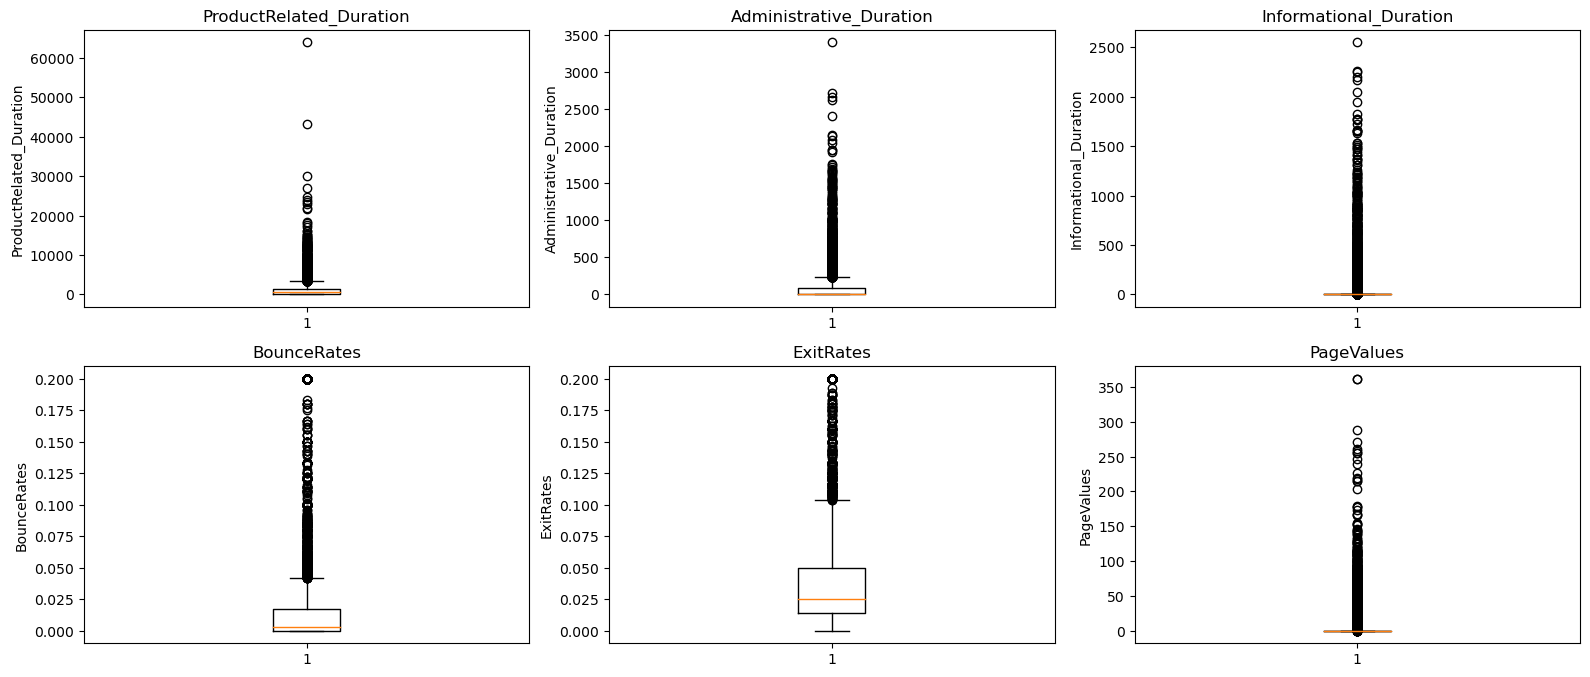

In [3]:
numeric_columns =["ProductRelated_Duration", 'Administrative_Duration',  'Informational_Duration', 'BounceRates', 'ExitRates', 'PageValues']

plt.figure(figsize=(16, 10))  # Adjust figure size as needed
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(3, 3, i)  # Adjust subplot layout as needed
    plt.boxplot(df[column])
    plt.title(column)
    plt.xlabel("")
    plt.ylabel(column)
plt.tight_layout()  # Adjust layout spacing
plt.show()

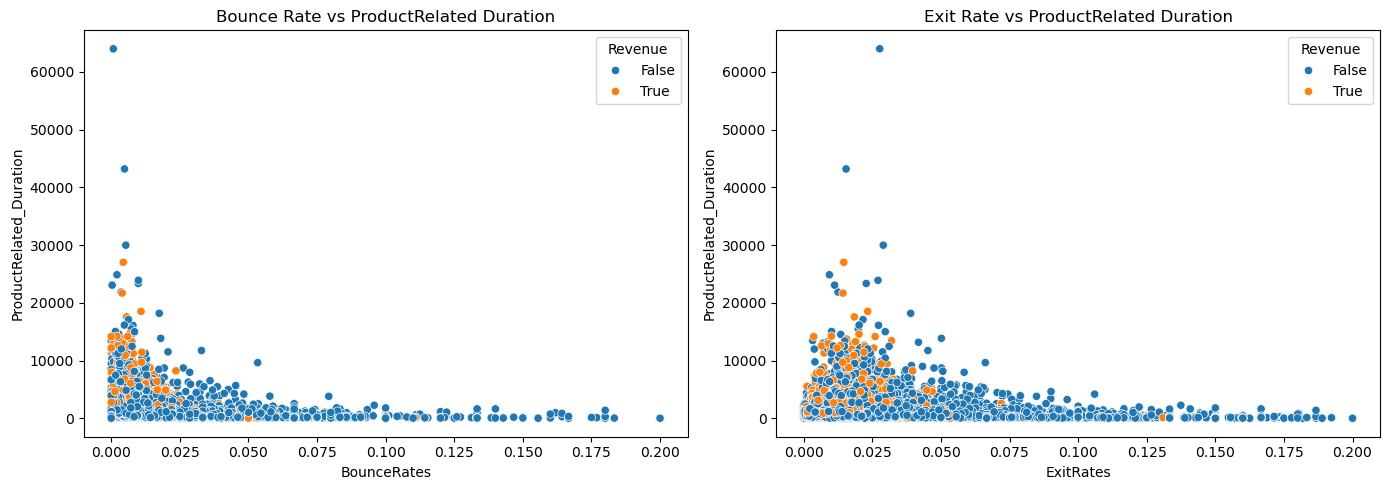

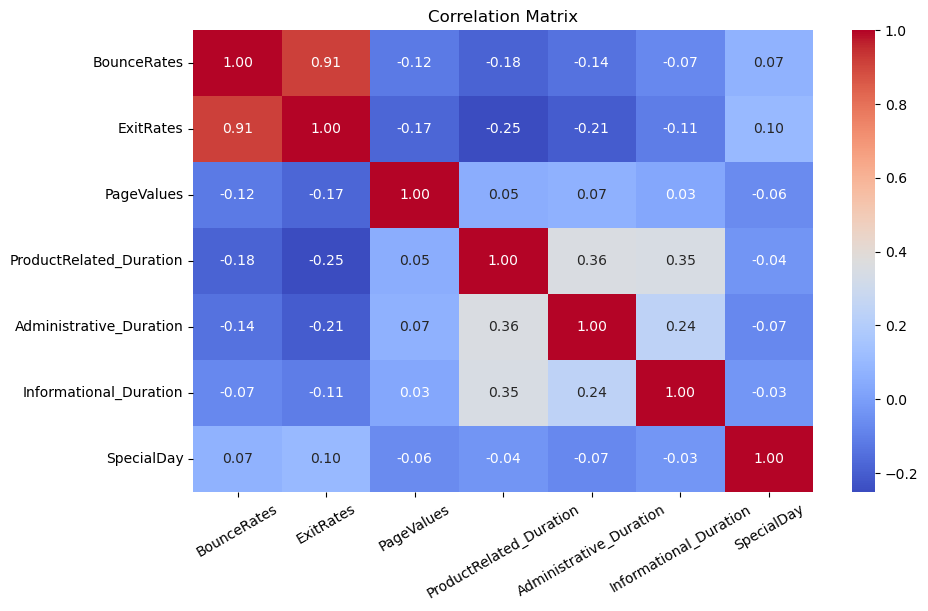

In [4]:
# Scatter plots
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='BounceRates', y='ProductRelated_Duration', data=df, hue='Revenue')
plt.title('Bounce Rate vs ProductRelated Duration')

plt.subplot(1, 2, 2)
sns.scatterplot(x='ExitRates', y='ProductRelated_Duration', data=df, hue='Revenue')
plt.title('Exit Rate vs ProductRelated Duration')

plt.tight_layout()
plt.show()


# Correlation matrix
corr_matrix = df[['BounceRates', 'ExitRates', 'PageValues', "ProductRelated_Duration", 'Administrative_Duration',  'Informational_Duration', "SpecialDay"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.xticks(rotation=30)
# plt.yticks(rotation=60)
plt.show()

In [5]:
desc=df[numeric_columns].describe()
desc.transpose()

,count,mean,std,min,25%,50%,75%,max
ProductRelated_Duration,12330.00,1194.75,1913.67,0.00,184.14,598.94,1464.16,63973.52
Administrative_Duration,12330.00,80.82,176.78,0.00,0.00,7.50,93.26,3398.75
Informational_Duration,12330.00,34.47,140.75,0.00,0.00,0.00,0.00,2549.38
BounceRates,12330.00,0.02,0.05,0.00,0.00,0.00,0.02,0.20
ExitRates,12330.00,0.04,0.05,0.00,0.01,0.03,0.05,0.20
PageValues,12330.00,5.89,18.57,0.00,0.00,0.00,0.00,361.76


In [6]:
# List of columns to check for outliers
columns = ["ProductRelated_Duration", 'Administrative_Duration', 'Informational_Duration']

# Loop through each column, calculate IQR, and replace outliers with the median
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value

# Print the DataFrame description after replacing outliers
print("Data with Outliers Imputed:")
df.describe()

Data with Outliers Imputed:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00
mean,2.32,35.53,0.50,0.00,31.73,772.61,0.02,0.04,5.89,0.06,2.12,2.36,3.15,4.07
std,3.32,55.71,1.27,0.00,44.48,764.98,0.05,0.05,18.57,0.20,0.91,1.72,2.40,4.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,0.00,7.00,184.14,0.00,0.01,0.00,0.00,2.00,2.00,1.00,2.00
50%,1.00,7.50,0.00,0.00,18.00,598.91,0.00,0.03,0.00,0.00,2.00,2.00,3.00,2.00
75%,4.00,54.76,0.00,0.00,38.00,1109.20,0.02,0.05,0.00,0.00,3.00,2.00,4.00,4.00
max,27.00,233.08,24.00,0.00,705.00,3382.29,0.20,0.20,361.76,1.00,8.00,13.00,9.00,20.00


In [7]:
# Calculate the total duration for each row
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

# Calculate the percentage of each duration type relative to the total duration
df['Admin_Percentage'] = np.where(df['Total_Duration'] == 0, 0, (df['Administrative_Duration'] / df['Total_Duration']) * 100)
df['Info_Percentage'] = np.where(df['Total_Duration'] == 0, 0, (df['Informational_Duration'] / df['Total_Duration']) * 100)
df['Product_Percentage'] = np.where(df['Total_Duration'] == 0, 0, (df['ProductRelated_Duration'] / df['Total_Duration']) * 100)

# Drop the Total_Duration column (optional)
# df = df.drop(columns=['Total_Duration'])

# Display the dataframe
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration,Admin_Percentage,Info_Percentage,Product_Percentage
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,1,Returning_Visitor,False,False,0.00,0.00,0.00,0.00
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,Feb,2,2,1,2,Returning_Visitor,False,False,64.00,0.00,0.00,100.00
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,4,1,9,3,Returning_Visitor,False,False,0.00,0.00,0.00,0.00
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,Feb,3,2,2,4,Returning_Visitor,False,False,2.67,0.00,0.00,100.00
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,Feb,3,3,1,4,Returning_Visitor,True,False,627.50,0.00,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.00,0,0.00,53,1783.79,0.01,0.03,12.24,0.00,Dec,4,6,1,1,Returning_Visitor,True,False,1928.79,7.52,0.00,92.48
12326,0,0.00,0,0.00,5,465.75,0.00,0.02,0.00,0.00,Nov,3,2,1,8,Returning_Visitor,True,False,465.75,0.00,0.00,100.00
12327,0,0.00,0,0.00,6,184.25,0.08,0.09,0.00,0.00,Nov,3,2,1,13,Returning_Visitor,True,False,184.25,0.00,0.00,100.00
12328,4,75.00,0,0.00,15,346.00,0.00,0.02,0.00,0.00,Nov,2,2,3,11,Returning_Visitor,False,False,421.00,17.81,0.00,82.19


In [8]:
bin_labels = ['0-10%', '10-50%', '50-70%', '70-80%', '80-90%', '90-100%']
bin_edges = [0, 10, 50, 70, 80, 90, 100]

# Create bins for the percentage variables
df['Product_Percentage_Bin'] = pd.cut(df['Product_Percentage'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Bin ExitRates into 5 categories
df['ExitRatesCategory'] = pd.cut(df['ExitRates'], bins=5, labels=['0.00-0.04', '0.04-0.08', '0.08-0.12', '0.12-0.16', '0.16-0.20'])

# Bin BounceRates into 5 categories
df['BounceRatesCategory'] = pd.cut(df['BounceRates'], bins=5, labels=['0.00-0.04', '0.04-0.08', '0.08-0.12', '0.12-0.16', '0.16-0.20'])


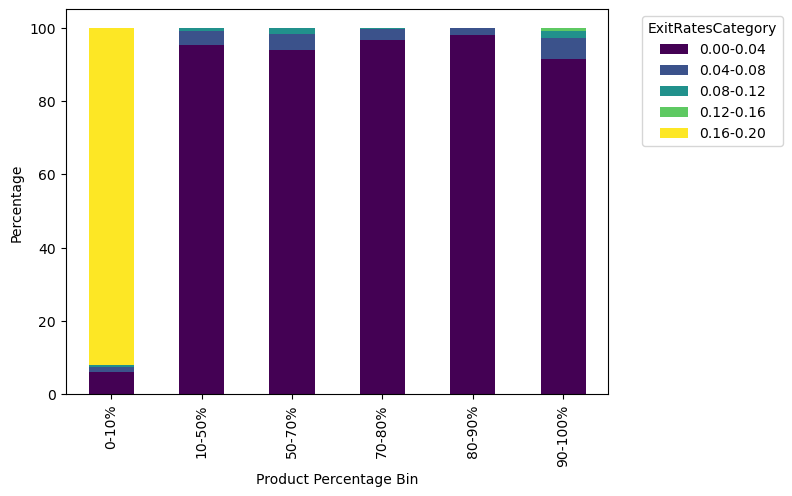

In [9]:

# Bin BounceRates into 5 categories
df['BounceRatesCategory'] = pd.cut(df['BounceRates'], bins=5, labels=['0.00-0.04', '0.04-0.08', '0.08-0.12', '0.12-0.16', '0.16-0.20'])

# Aggregate data by counting the occurrences within each category and Admin_Percentage_Bin for BounceRates
bounce_agg_data = df.groupby(['BounceRatesCategory', 'Product_Percentage_Bin']).size().unstack(fill_value=0)

# Normalize to get percentages for 100% stacked bar plot for BounceRates
bounce_agg_data_percentage = bounce_agg_data.div(bounce_agg_data.sum(axis=1), axis=0)

# Get the value counts as a DataFrame for BounceRates
bounce_counts = df[["Product_Percentage_Bin", "BounceRatesCategory"]].value_counts().sort_index().reset_index(name='Count')

# Pivot the data to create a table for plotting BounceRates
bounce_counts_pivot = bounce_counts.pivot(index='Product_Percentage_Bin', columns='BounceRatesCategory', values='Count')

# Normalize to get percentages
counts_pivot_percentage = bounce_counts_pivot.div(bounce_counts_pivot.sum(axis=1), axis=0) * 100

# Create 100% stacked bar plot
counts_pivot_percentage.plot(kind='bar', stacked=True, figsize=(7, 5), colormap='viridis')

# Add titles and labels
# plt.title('100% Stacked Bar Graph of BounceRates Categories vs Product_Percentage_Bin')
plt.xlabel('Product Percentage Bin')
plt.ylabel('Percentage')
plt.legend(title='ExitRatesCategory', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

In [10]:
df["Product_Percentage_Flag"] = np.where((df["Product_Percentage"] >= 80) & (df["Product_Percentage"] <= 90), 1 , 0)
bounce_rates_flag_1 = df[df['Product_Percentage_Flag'] == 1]['BounceRates']
bounce_rates_flag_0 = df[df['Product_Percentage_Flag'] == 0]['BounceRates']

In [11]:
from scipy.stats import levene

# Levene's test for homogeneity of variance
levene_test = levene(bounce_rates_flag_1, bounce_rates_flag_0)

print(f"Levene's test: W-statistic={levene_test[0]}, p-value={levene_test[1]}")

if levene_test[1] > 0.05:
    print("Variances are equal (homogeneity of variance).")
else:
    print("Variances are not equal (heterogeneity of variance).")


Levene's test: W-statistic=136.6769093274498, p-value=2.0780618762422207e-31
Variances are not equal (heterogeneity of variance).


In [12]:
print(np.var(bounce_rates_flag_1), np.var(bounce_rates_flag_0))

0.0001224772604408825 0.0025504018371768924


In [14]:
from scipy.stats import ttest_ind
# Perform Welch's t-test
ttest_ind(bounce_rates_flag_1, bounce_rates_flag_0, equal_var = False)

TtestResult(statistic=-29.804263765497932, pvalue=1.0397291891548436e-184, df=7606.475900174819)

In [15]:
# Define bins with modified intervals
bins = [0, 100, 300, 600, 1200, float('inf')]
labels = ['0-100', '100-300', '300-600', '600-1200', '>1200']

# Categorize 'ProductRelated_Duration' into the modified bins
df['Product_Duration_Bin'] = pd.cut(df['ProductRelated_Duration'], bins=bins, labels=labels, right=False)


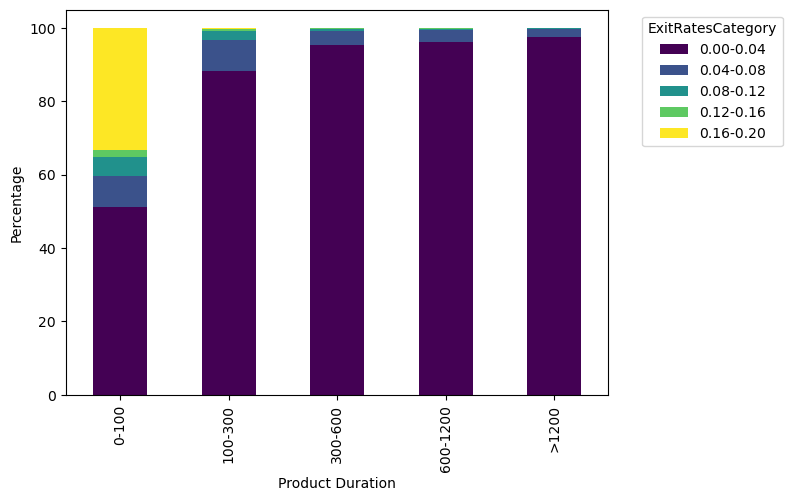

In [16]:

# Bin BounceRates into 5 categories
df['BounceRatesCategory'] = pd.cut(df['BounceRates'], bins=5, labels=['0.00-0.04', '0.04-0.08', '0.08-0.12', '0.12-0.16', '0.16-0.20'])

# Aggregate data by counting the occurrences within each category and Admin_Percentage_Bin for BounceRates
bounce_agg_data = df.groupby(['BounceRatesCategory', 'Product_Duration_Bin']).size().unstack(fill_value=0)

# Normalize to get percentages for 100% stacked bar plot for BounceRates
bounce_agg_data_percentage = bounce_agg_data.div(bounce_agg_data.sum(axis=1), axis=0)

# Get the value counts as a DataFrame for BounceRates
bounce_counts = df[["Product_Duration_Bin", "BounceRatesCategory"]].value_counts().sort_index().reset_index(name='Count')

# Pivot the data to create a table for plotting BounceRates
bounce_counts_pivot = bounce_counts.pivot(index='Product_Duration_Bin', columns='BounceRatesCategory', values='Count')

# Normalize to get percentages
counts_pivot_percentage = bounce_counts_pivot.div(bounce_counts_pivot.sum(axis=1), axis=0) * 100

# Create 100% stacked bar plot
counts_pivot_percentage.plot(kind='bar', stacked=True, figsize=(7, 5), colormap='viridis')

# Add titles and labels
# plt.title('100% Stacked Bar Graph of BounceRates Categories vs Product_Duration_Bin')
plt.xlabel('Product Duration')
plt.ylabel('Percentage')
plt.legend(title='ExitRatesCategory', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

In [17]:
df['Product_Duration_Bin'].value_counts()

Product_Duration_Bin
300-600     2968
>1200       2819
600-1200    2377
0-100       2122
100-300     2044
Name: count, dtype: int64

In [18]:
df["Product_Duration_Flag"] = np.where((df["ProductRelated_Duration"] <= 300), 1 , 0)
bounce_rates_flag_1 = df[df['Product_Duration_Flag'] == 1]['BounceRates']
bounce_rates_flag_0 = df[df['Product_Duration_Flag'] == 0]['BounceRates']

In [19]:
from scipy.stats import levene

# Levene's test for homogeneity of variance
levene_test = levene(bounce_rates_flag_1, bounce_rates_flag_0)

print(f"Levene's test: W-statistic={levene_test[0]}, p-value={levene_test[1]}")

if levene_test[1] > 0.05:
    print("Variances are equal (homogeneity of variance).")
else:
    print("Variances are not equal (heterogeneity of variance).")

Levene's test: W-statistic=2280.92369002168, p-value=0.0
Variances are not equal (heterogeneity of variance).


In [21]:
from scipy.stats import ttest_ind
# Perform Welch's t-test
ttest_ind(bounce_rates_flag_1, bounce_rates_flag_0, equal_var = False)

TtestResult(statistic=34.47135369403183, pvalue=2.5382965912795686e-230, df=4330.745553771795)

H2: The interplay between SpecialDay promotions and user engagement types (Administrative, Informational, and ProductRelated) significantly affects ExitRates.

In [22]:
df["specialday_flag"] = np.where(df["SpecialDay"] > 0 , 1 , 0)

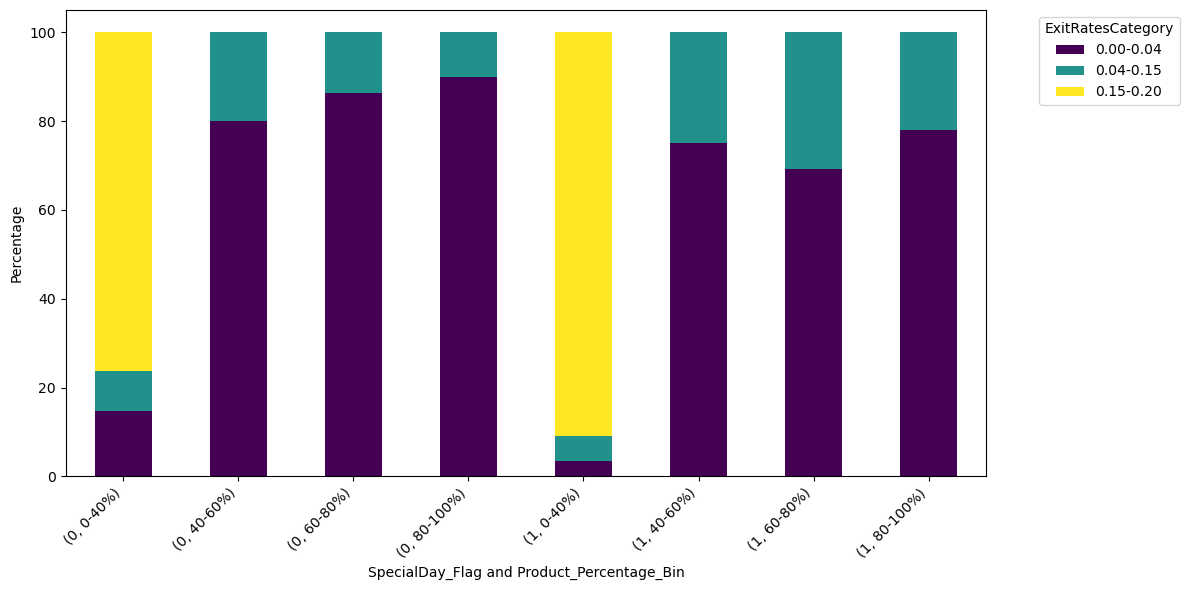

In [23]:
# Create bins for Product_Percent and ExitRates
product_percent_bins = [0, 40, 60,  80 , 100]
exit_rate_bins = [0, 0.04, 0.15, 0.20]

df['Product_Percentage_Bin'] = pd.cut(df['Product_Percentage'], bins=product_percent_bins, labels=['0-40%', '40-60%', '60-80%', '80-100%'], right=False)
df['ExitRatesCategory'] = pd.cut(df['ExitRates'], bins=exit_rate_bins, labels=['0.00-0.04', '0.04-0.15', '0.15-0.20'])

# Pivot table to prepare data for 100% stacked bar plot
pivot_df = df.pivot_table(index=['specialday_flag', 'Product_Percentage_Bin'], columns='ExitRatesCategory', aggfunc='size', fill_value=0)

# Normalize the data to get percentages
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plotting the 100% stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
# plt.title('100% Stacked Bar Plot of ExitRatesCategory by SpecialDay and Product_Percentage_Bin')
plt.xlabel('SpecialDay_Flag and Product_Percentage_Bin')
plt.ylabel('Percentage')
plt.legend(title='ExitRatesCategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
df["Product_Percentage_Flag"] = np.where((df["Product_Percentage"] >= 40), 1 , 0)

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Two-Way ANOVA
model = ols('ExitRates ~ C(specialday_flag) + C(Product_Percentage_Flag) + C(specialday_flag):C(Product_Percentage_Flag)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(specialday_flag),0.38,1.00,336.11,0.00
C(Product_Percentage_Flag),14.71,1.00,12906.98,0.00
C(specialday_flag):C(Product_Percentage_Flag),0.00,1.00,2.86,0.09
Residual,14.05,12326.00,NaN,NaN


H3: Higher Page Values are associated with the combined durations of Administrative, Informational, and Product Related engagements.

In [26]:
df["Total_Duration"] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

Text(0.5, 0, 'Total Duration')

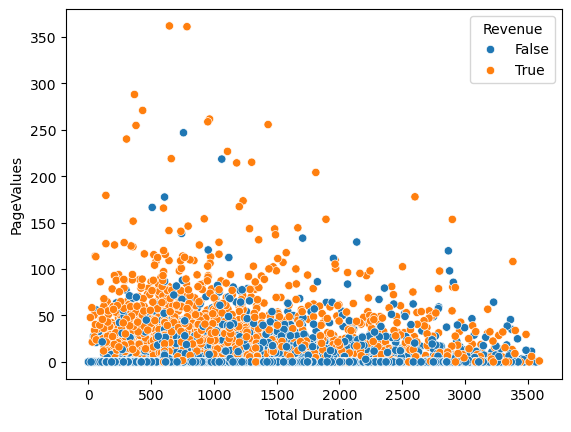

In [27]:
sns.scatterplot(y='PageValues', x='Total_Duration', data=df, hue='Revenue')
plt.xlabel("Total Duration")
# plt.title('PageValues vs Admin_Info_Prod')

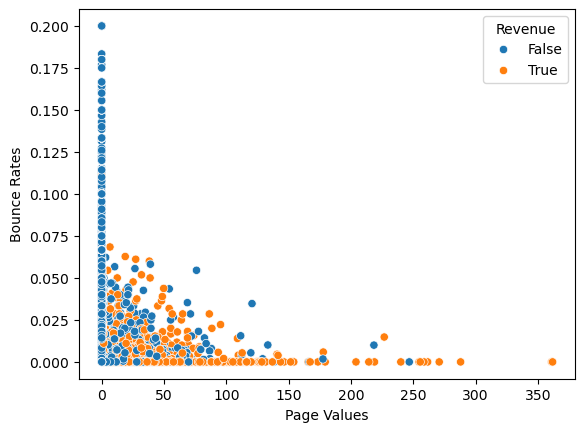

In [39]:
sns.scatterplot(data=df, x='PageValues', y='BounceRates', hue='Revenue')
plt.xlabel('Page Values')
plt.ylabel('Bounce Rates')
plt.show()

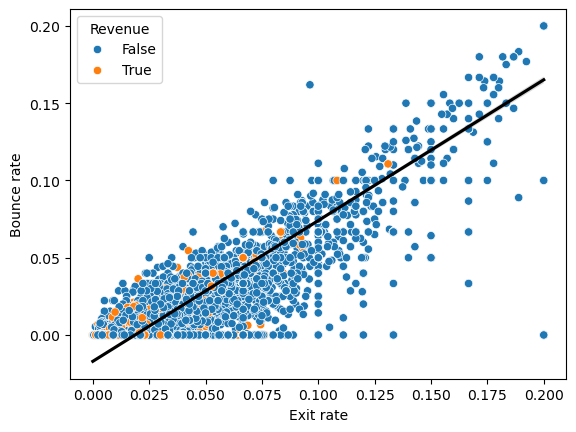

In [33]:
df_bounce_exit = df.copy()

# Use custom colors in scatterplot
# plt.figure(figsize=(8,6))
sns.scatterplot(data=df_bounce_exit, x='ExitRates', y='BounceRates', hue='Revenue')

# Add regression line
sns.regplot(data=df_bounce_exit, x='ExitRates', y='BounceRates', scatter=False, color='Black')

plt.xlabel('Exit rate')
plt.ylabel('Bounce rate')
plt.legend(title='Revenue')
plt.show()